In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_directory='Bird_Species_Classification_Streamlit\preprocessed_train'
test_directory='Bird_Species_Classification_Streamlit\preprocessed_test'
val_directory='Bird_Species_Classification_Streamlit\preprocessed_valid'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [5]:
#   # useful for getting number of classes
# folders = glob('Bird_Species_Classification_Streamlit/preprocessed_train/*')
# len(folders)
import os

# Path to the preprocessed_train folder
# folder_path = "C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Bird_Species_Classification_Streamlit\\preprocessed_train"
folder_path = "C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Bird_Species_Classification_Streamlit\\preprocessed_train"


# Get a list of all subfolders in the preprocessed_train folder
subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

# Count the number of subfolders
num_subfolders = len(subfolders)

print("Number of subfolders:", num_subfolders)


Number of subfolders: 200


In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(num_subfolders, activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

                                                                 
Total params: 19732488 (75.27 MB)
Trainable params: 5017800 (19.14 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
import os

train_directory = "C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Bird_Species_Classification_Streamlit\\preprocessed_train"
test_directory = "C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Bird_Species_Classification_Streamlit\\preprocessed_test"  # Replace 'path_to_test_directory' with the actual path

if not os.path.exists(train_directory):
    raise FileNotFoundError(f"Directory '{train_directory}' does not exist!")

if not os.path.exists(test_directory):
    raise FileNotFoundError(f"Directory '{test_directory}' does not exist!")

# Continue with the rest of your code


In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 31094 images belonging to 200 classes.
Found 1000 images belonging to 200 classes.


In [11]:
print(len(training_set))
print(len(test_set))

972
32


In [12]:
import scipy
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15


972/972 [==============================] - 4787s 5s/step - loss: 3.7534 - accuracy: 0.4108 - val_loss: 1.9629 - val_accuracy: 0.6720
Epoch 2/15
972/972 [==============================] - 5493s 6s/step - loss: 1.9614 - accuracy: 0.6573 - val_loss: 1.9402 - val_accuracy: 0.6980
Epoch 3/15
972/972 [==============================] - 5043s 5s/step - loss: 1.5751 - accuracy: 0.7293 - val_loss: 1.8432 - val_accuracy: 0.7370
Epoch 4/15
972/972 [==============================] - 4560s 5s/step - loss: 1.3103 - accuracy: 0.7758 - val_loss: 1.6830 - val_accuracy: 0.7660
Epoch 5/15
972/972 [==============================] - 5826s 6s/step - loss: 1.1853 - accuracy: 0.7990 - val_loss: 1.7866 - val_accuracy: 0.7610
Epoch 6/15
972/972 [==============================] - 5404s 6s/step - loss: 1.0426 - accuracy: 0.8244 - val_loss: 1.8197 - val_accuracy: 0.7900
Epoch 7/15
972/972 [==============================] - 5984s 6s/step - loss: 0.9309 - accuracy: 0.8437 - val_loss: 1.9969 - val_accurac

In [13]:
VGG_model_accuracy = model.evaluate(test_set)[1]
print("VGG model accuracy: {:.2f}%".format(VGG_model_accuracy*100))

32/32 [==============================] - 107s 3s/step - loss: 2.4445 - accuracy: 0.7760
VGG model accuracy: 77.60%


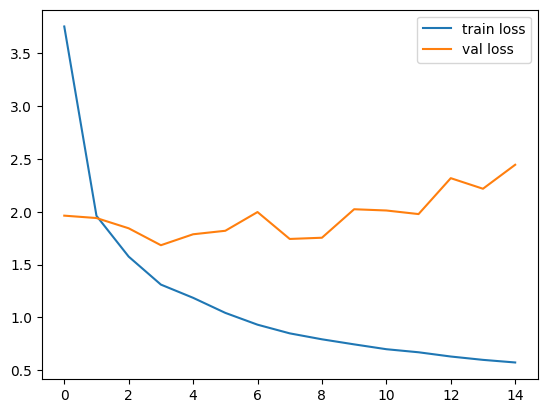

In [14]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

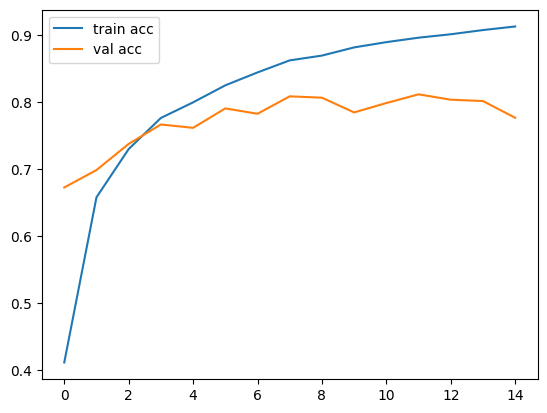

In [15]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [16]:
model.save('image_model.h5')

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./image_model.h5',compile=False)  

In [18]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}
print(lab)

{0: 'ABBOTTS BABBLER', 1: 'ABBOTTS BOOBY', 2: 'ABYSSINIAN GROUND HORNBILL', 3: 'AFRICAN CROWNED CRANE', 4: 'ALBATROSS', 5: 'ALBERTS TOWHEE', 6: 'ALEXANDRINE PARAKEET', 7: 'ALPINE CHOUGH', 8: 'ALTAMIRA YELLOWTHROAT', 9: 'AMERICAN AVOCET', 10: 'AMETHYST WOODSTAR', 11: 'APAPANE', 12: 'APOSTLEBIRD', 13: 'ARARIPE MANAKIN', 14: 'ASHY STORM PETREL', 15: 'ASHY THRUSHBIRD', 16: 'ASIAN CRESTED IBIS', 17: 'ASIAN DOLLARD BIRD', 18: 'ASIAN GREEN BEE EATER', 19: 'ASIAN OPENBILL STORK', 20: 'AUCKLAND SHAQ', 21: 'AUSTRAL CANASTERO', 22: 'AUSTRALASIAN FIGBIRD', 23: 'AVADAVAT', 24: 'AZARAS SPINETAIL', 25: 'AZURE BREASTED PITTA', 26: 'AZURE JAY', 27: 'AZURE TANAGER', 28: 'AZURE TIT', 29: 'BEARDED BARBET', 30: 'BEARDED BELLBIRD', 31: 'BEARDED REEDLING', 32: 'BELTED KINGFISHER', 33: 'BIRD OF PARADISE', 34: 'BLACK SWAN', 35: 'BLONDE CRESTED WOODPECKER', 36: 'BLOOD PHEASANT', 37: 'BLUE COAU', 38: 'BLUE DACNIS', 39: 'BLUE GRAY GNATCATCHER', 40: 'BLUE GROSBEAK', 41: 'BLUE GROUSE', 42: 'BLUE HERON', 43: 'BLUE M

In [19]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 0s 148ms/step


'ASIAN CRESTED IBIS'

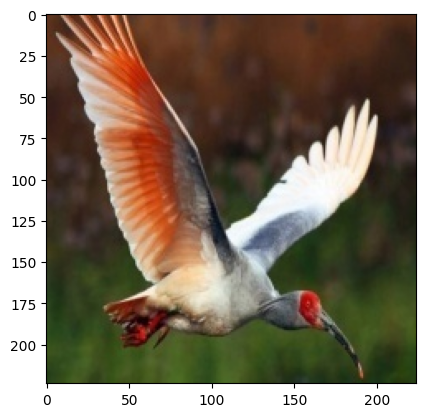

In [23]:
img='C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Bird_Species_Classification_Streamlit\\preprocessed_test\\ASIAN CRESTED IBIS\\2.jpg'
pic=load_img('C:\\Users\\DELL\\OneDrive\\Desktop\\MajorProject\\Bird_Species_Classification_Streamlit\\preprocessed_test\\ASIAN CRESTED IBIS\\2.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [21]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.15.0
2.15.0
